In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [2]:
print(train.info(),'\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [4]:
print('TRAIN DATASET')
train.head()

TRAIN DATASET


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('TEST DATASET')
test.head()

TEST DATASET


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
### put label to ytrain variable
ytrain = train['label']
### drop label from xtrain 
xtrain = train.drop( ['label'],axis=1)

##### Number of Class

In [7]:
ytrain.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

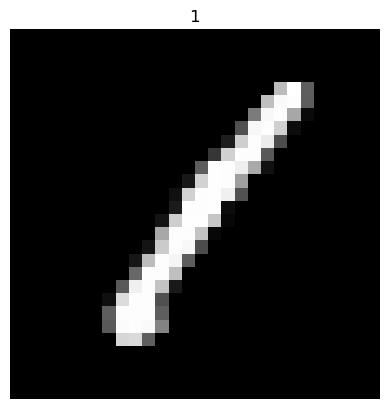

In [8]:
#### visualize some samples
img = xtrain.loc[0].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

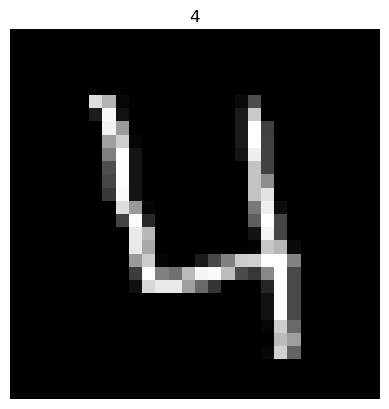

In [9]:
#### visualize another samples
img = xtrain.loc[3].to_numpy()
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

##### Normalize the Data

dilakukan agar setiap nilai dalam pixel berada pada  range [0-1].
dengan cara membagi setiap pixel dengan 255, karena tiap pixel diwakili oelh nilai intensitas antara (0-255)

In [10]:
# Normalize Data
xtrain = xtrain/255.0
test = test/255.0


In [11]:
# Reshape
xtrain = xtrain.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print('xtrain shape : ',xtrain.shape)
print('test shape : ',test.shape)

xtrain shape :  (42000, 28, 28, 1)
test shape :  (28000, 28, 28, 1)


###### Label Encoder

In [12]:
print('Before Label Encoder ')
ytrain.head(6)

Before Label Encoder 


0    1
1    0
2    1
3    4
4    0
5    0
Name: label, dtype: int64

In [13]:
# Encoder ytrain 
from keras.utils.np_utils import to_categorical
ytrain = to_categorical(ytrain, num_classes=10)

print('After Label Encoder \n')
print('dimension :',ytrain.shape)
ytrain

After Label Encoder 

dimension : (42000, 10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

##### Spliting the Data

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.1, random_state=2)

print('xtrain shape :', xtrain.shape)
print('xval shape :', xval.shape)
print('ytrain shape :', ytrain.shape)
print('yval shape :', yval.shape)

xtrain shape : (37800, 28, 28, 1)
xval shape : (4200, 28, 28, 1)
ytrain shape : (37800, 10)
yval shape : (4200, 10)


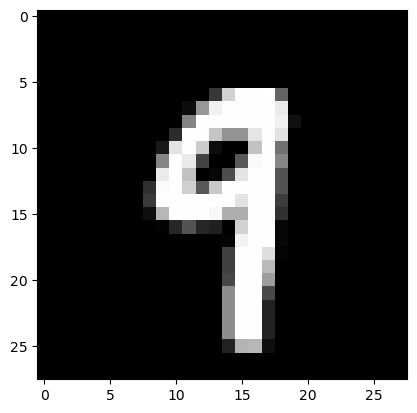

In [15]:
# Some examples
plt.imshow(xtrain[2][:,:,0],cmap='gray')
plt.show()

#### Create Model

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5,5),padding='Same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [17]:
# Define Optimizer
optimezer = Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
#
# Compile the Model
model.compile(optimizer=optimezer, loss = "categorical_crossentropy", metrics = ['accuracy'])

C:\Users\jafar\miniconda3\envs\tensorflowGPU\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


##### Data Augmentation

In [18]:
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,

    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(xtrain)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [20]:
# Fit the Model

batch_size = 250
epoch = 10
history = model.fit(datagen.flow(xtrain,ytrain,batch_size=batch_size), epochs=epoch,
                              validation_data= (xval, yval),
                             steps_per_epoch= xtrain.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 22s 92ms/step - loss: 1.1435 - accuracy: 0.6136 - val_loss: 0.2438 - val_accuracy: 0.9390
Epoch 2/10
151/151 [==============================] - 13s 87ms/step - loss: 0.4581 - accuracy: 0.8517 - val_loss: 0.1521 - val_accuracy: 0.9564
Epoch 3/10
151/151 [==============================] - 14s 92ms/step - loss: 0.3368 - accuracy: 0.8921 - val_loss: 0.1144 - val_accuracy: 0.9657
Epoch 4/10
151/151 [==============================] - 14s 90ms/step - loss: 0.2768 - accuracy: 0.9130 - val_loss: 0.0944 - val_accuracy: 0.9683
Epoch 5/10
151/151 [==============================] - 12s 82ms/step - loss: 0.2414 - accuracy: 0.9238 - val_loss: 0.0828 - val_accuracy: 0.9750
Epoch 6/10
151/151 [==============================] - 13s 86ms/step - loss: 0.2108 - accuracy: 0.9353 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 7/10
151/151 [==============================] - 14s 91ms/step - loss: 0.1948 - accuracy: 0.9389 - val_loss: 0.0622 - val_accuracy:

##### Evaluate Model

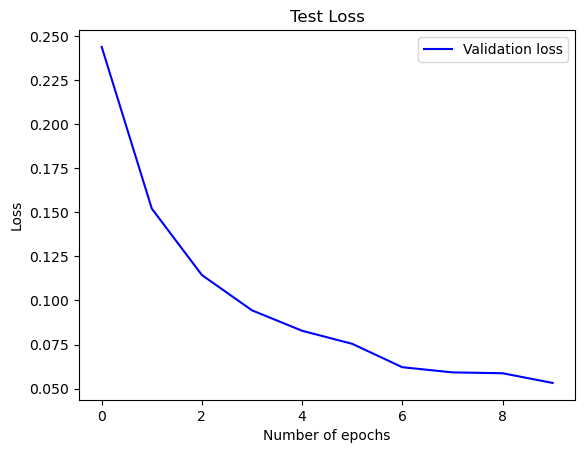

In [21]:
plt.plot(history.history['val_loss'], color = 'b', label = 'Validation loss')
plt.title('Test Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Confusion Matrix

132/132 [==============================] - 0s 2ms/step


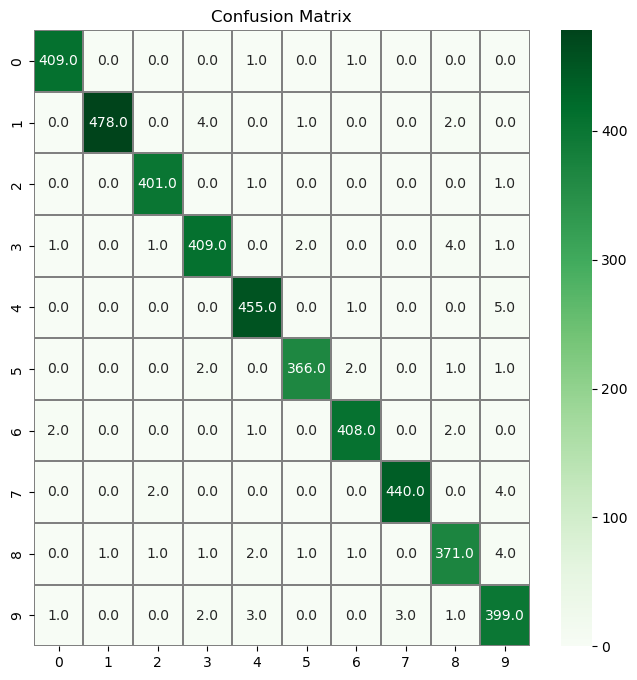

In [22]:
ypred = model.predict(xval)

ypred_class = np.argmax(ypred,axis = 1)
ytrue = np.argmax(yval, axis = 1)

true = pd.Series(ytrue)
pred_class = pd.Series(ypred_class)

confusion = confusion_matrix( ytrue.tolist(), ypred_class.tolist())

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion, annot = True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt = '.1f', ax = ax)
plt.xlabel = ('Predictid Label')
plt.ylabel = ('True Label')
plt.title ('Confusion Matrix')
plt.show()

##### trying to predic our data

1/1 [==============================] - 0s 24ms/step
0


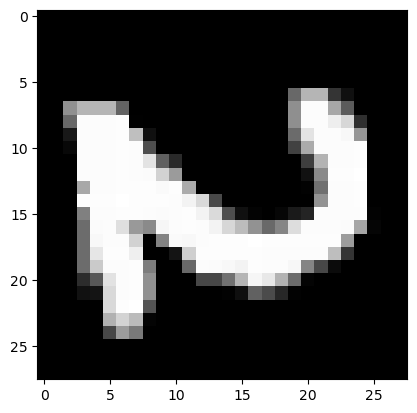

In [56]:
# !pip install opencv-python

import cv2

image = cv2.imread('sample_4.png',0)
image = cv2.resize(image,(28,28))
image = np.reshape(image,[-1,28,28,1])

print(np.argmax(model.predict(image)))

plt.imshow(image[0][:,:,],cmap = 'gray')


1/1 [==============================] - 0s 23ms/step
0


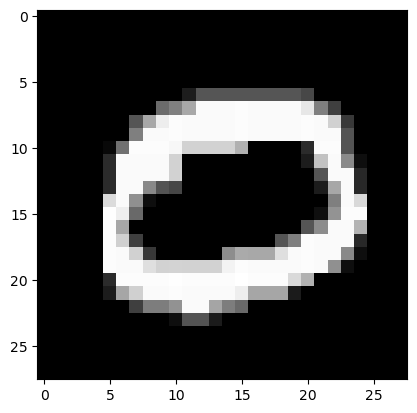

In [63]:
img = test[1][:,:,0]
plt.imshow(img,cmap='gray')
img = np.reshape(img,[-1,28,28,1])

print(np.argmax(model.predict(img)))
# plt.show(img,cmap='grey')